# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

### Exercise 12.1

<span style="color:red">Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: <span style="color:red">watch to accuracy and loss for training and validation data and comment on the performances</span>.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

X_test shape: (10000, 28, 28)
Y_test shape: (10000,)
X_train shape: (60000, 784)
X_test shape: (10000, 784)

an example of a data point with label 4


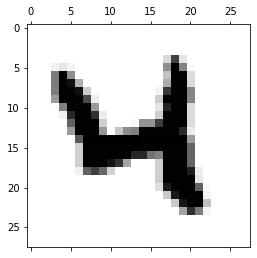

... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)
Model architecture created successfully!
Model compiled successfully and ready to be trained.
Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.7280 - acc: 0.7886 - val_loss: 0.3029 - val_acc: 0.9174
Epoch 2/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.3727 - acc: 0.8942 - val_loss: 0.2340 - val_acc: 0.9322
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.3016 - acc: 0.9159 - val_loss: 0.1971 - val_acc: 0.9418
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2597 - acc: 0.9276 - val_loss: 0.1722 - val_acc: 0.9481
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2301 - acc: 0.9352 - val_loss: 0.1571 - val_acc: 0.9501
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2070 - acc: 0.9418

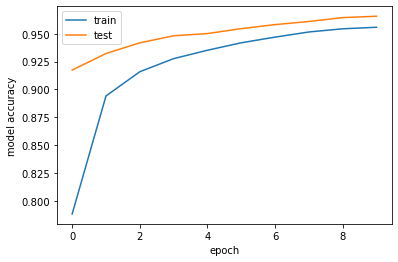

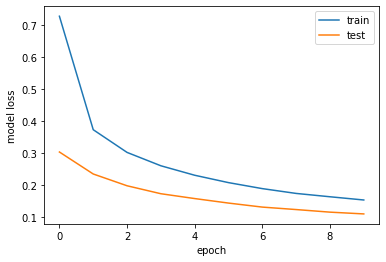

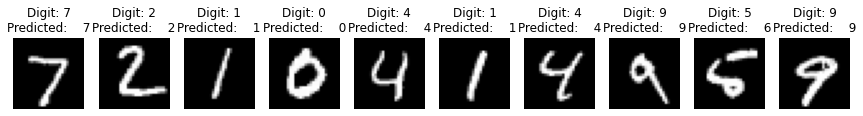

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [4]:

epochs = 10


import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

#==========================================
#   LOAD AND PROCESS DATA 12.1

from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) # l'input
print('Y_train shape:', Y_train.shape) # label, ovvero gli output
print()
print('X_test shape:', X_test.shape) # l'input
print('Y_test shape:', Y_test.shape) # label, ovvero gli outpu

#==========================================
#   LOAD AND PROCESS DATA 12.2

# you will need the following for Convolutional Neural Networks
#from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
#if keras.backend.image_data_format() == 'channels_first':
#    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
#    input_shape = (1, img_rows, img_cols)
#else:
#    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
#    input_shape = (img_rows, img_cols, 1)
    
#print('X_train shape:', X_train.shape)
#print('Y_train shape:', Y_train.shape)
#print()
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')

#==========================================

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

#==========================================
#   2. Define the Neural Net and its Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # la seconda per evitare overfitting, impara generalizzando

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5)) # spegne alcuni neurone, per rendere "più difficile" l'apprendimento
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

#==========================================
#   3. Choose the Optimizer and the Cost Function

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam # <<<<<< try at least two others different from SGD

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc']) # nota: il modello ottimizza con la loss, non con la metrica!
    return model

print('Model compiled successfully and ready to be trained.')

#==========================================
#   4. TRAIN THE MODEL

# training parameters
batch_size = 32
#epochs = 1 # farlo girare di più di così

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1,
                        validation_data=(X_test, Y_test))

#==========================================
#   5. Evaluate the Model Performance on the *Unseen* Test Data

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#==========================================

#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()


